In [96]:
# import necessary dependecies 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
# load dataset and explore it 

df = pd .read_csv('/kaggle/input/titanic-data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
# Overview of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
# statistics of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
# checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
# replacing null values of Age column with mean

df['Age']=df['Age'].fillna(value=df['Age'].mean())


In [102]:
# facing error in this line
df['Embarked']=df['Embarked'].fillna(value=df['Embarked'].mode())


In [103]:
# drop unnecessary columns 
df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [104]:
# Convert 'Sex' and 'Embarked' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [105]:
# Display the first few rows of the cleaned dataset
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [ ]:
## Exercise: 
Create a simple line plot using Matplotlib to display the trend of a list of values over time.

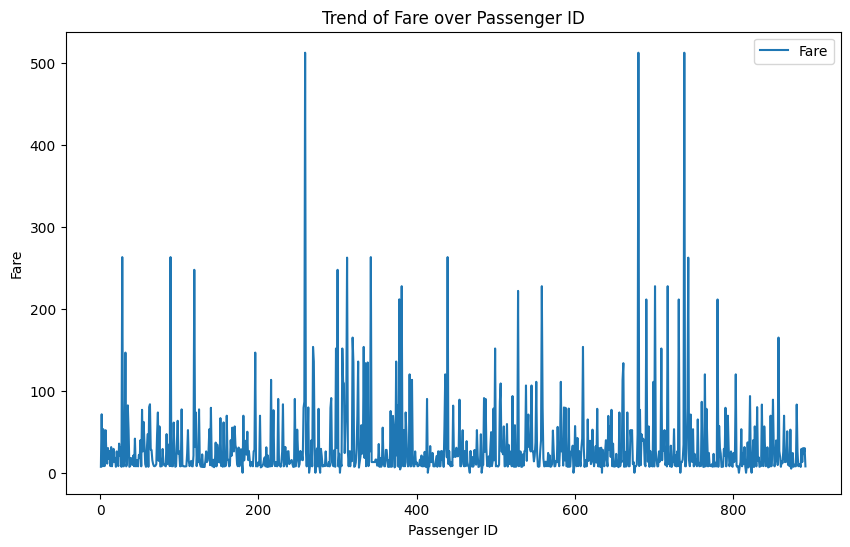

In [106]:
# Create a simple line plot
plt.figure(figsize=(10, 6))
plt.plot(df['PassengerId'], df['Fare'], label='Fare')
plt.xlabel('Passenger ID')
plt.ylabel('Fare')
plt.title('Trend of Fare over Passenger ID')
plt.legend()
plt.show()

## Exercise: 
Plot a bar chart using Matplotlib to show the frequency of different categories in a dataset.

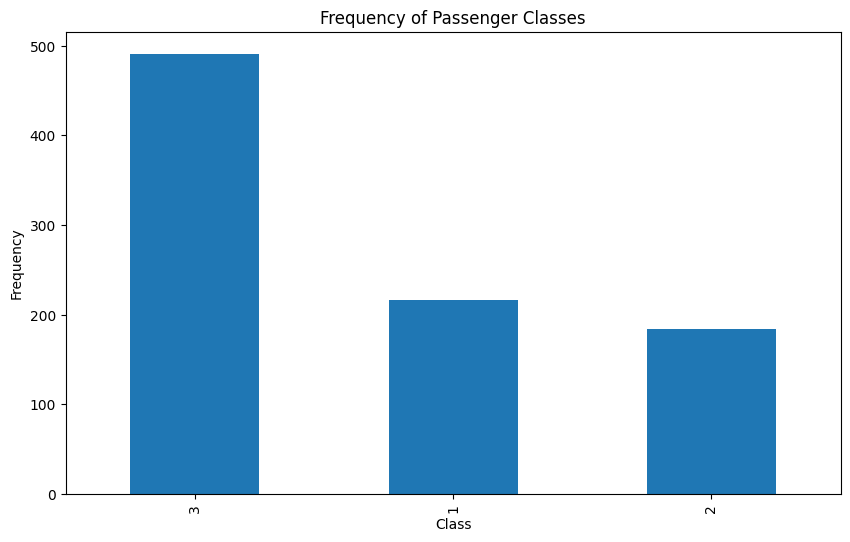

In [107]:
# Plotting a bar chart of passenger class frequency
plt.figure(figsize=(10, 6))
df['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Passenger Classes')
plt.show()


## Exercise: 
Create a scatter plot using Matplotlib to visualize the relationship between two variables in a dataset.

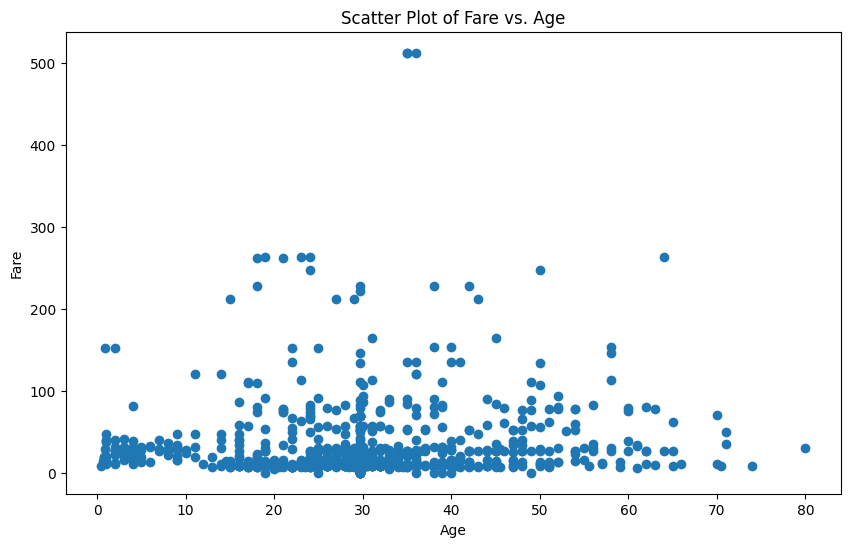

In [108]:
# Scatter plot of Fare vs. Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs. Age')
plt.show()


## Exercise: 
Load a dataset using Seaborn's built-in dataset functions and create a pairplot to visualize the relationships between all pairs of features.

In [109]:
#loading builtin dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

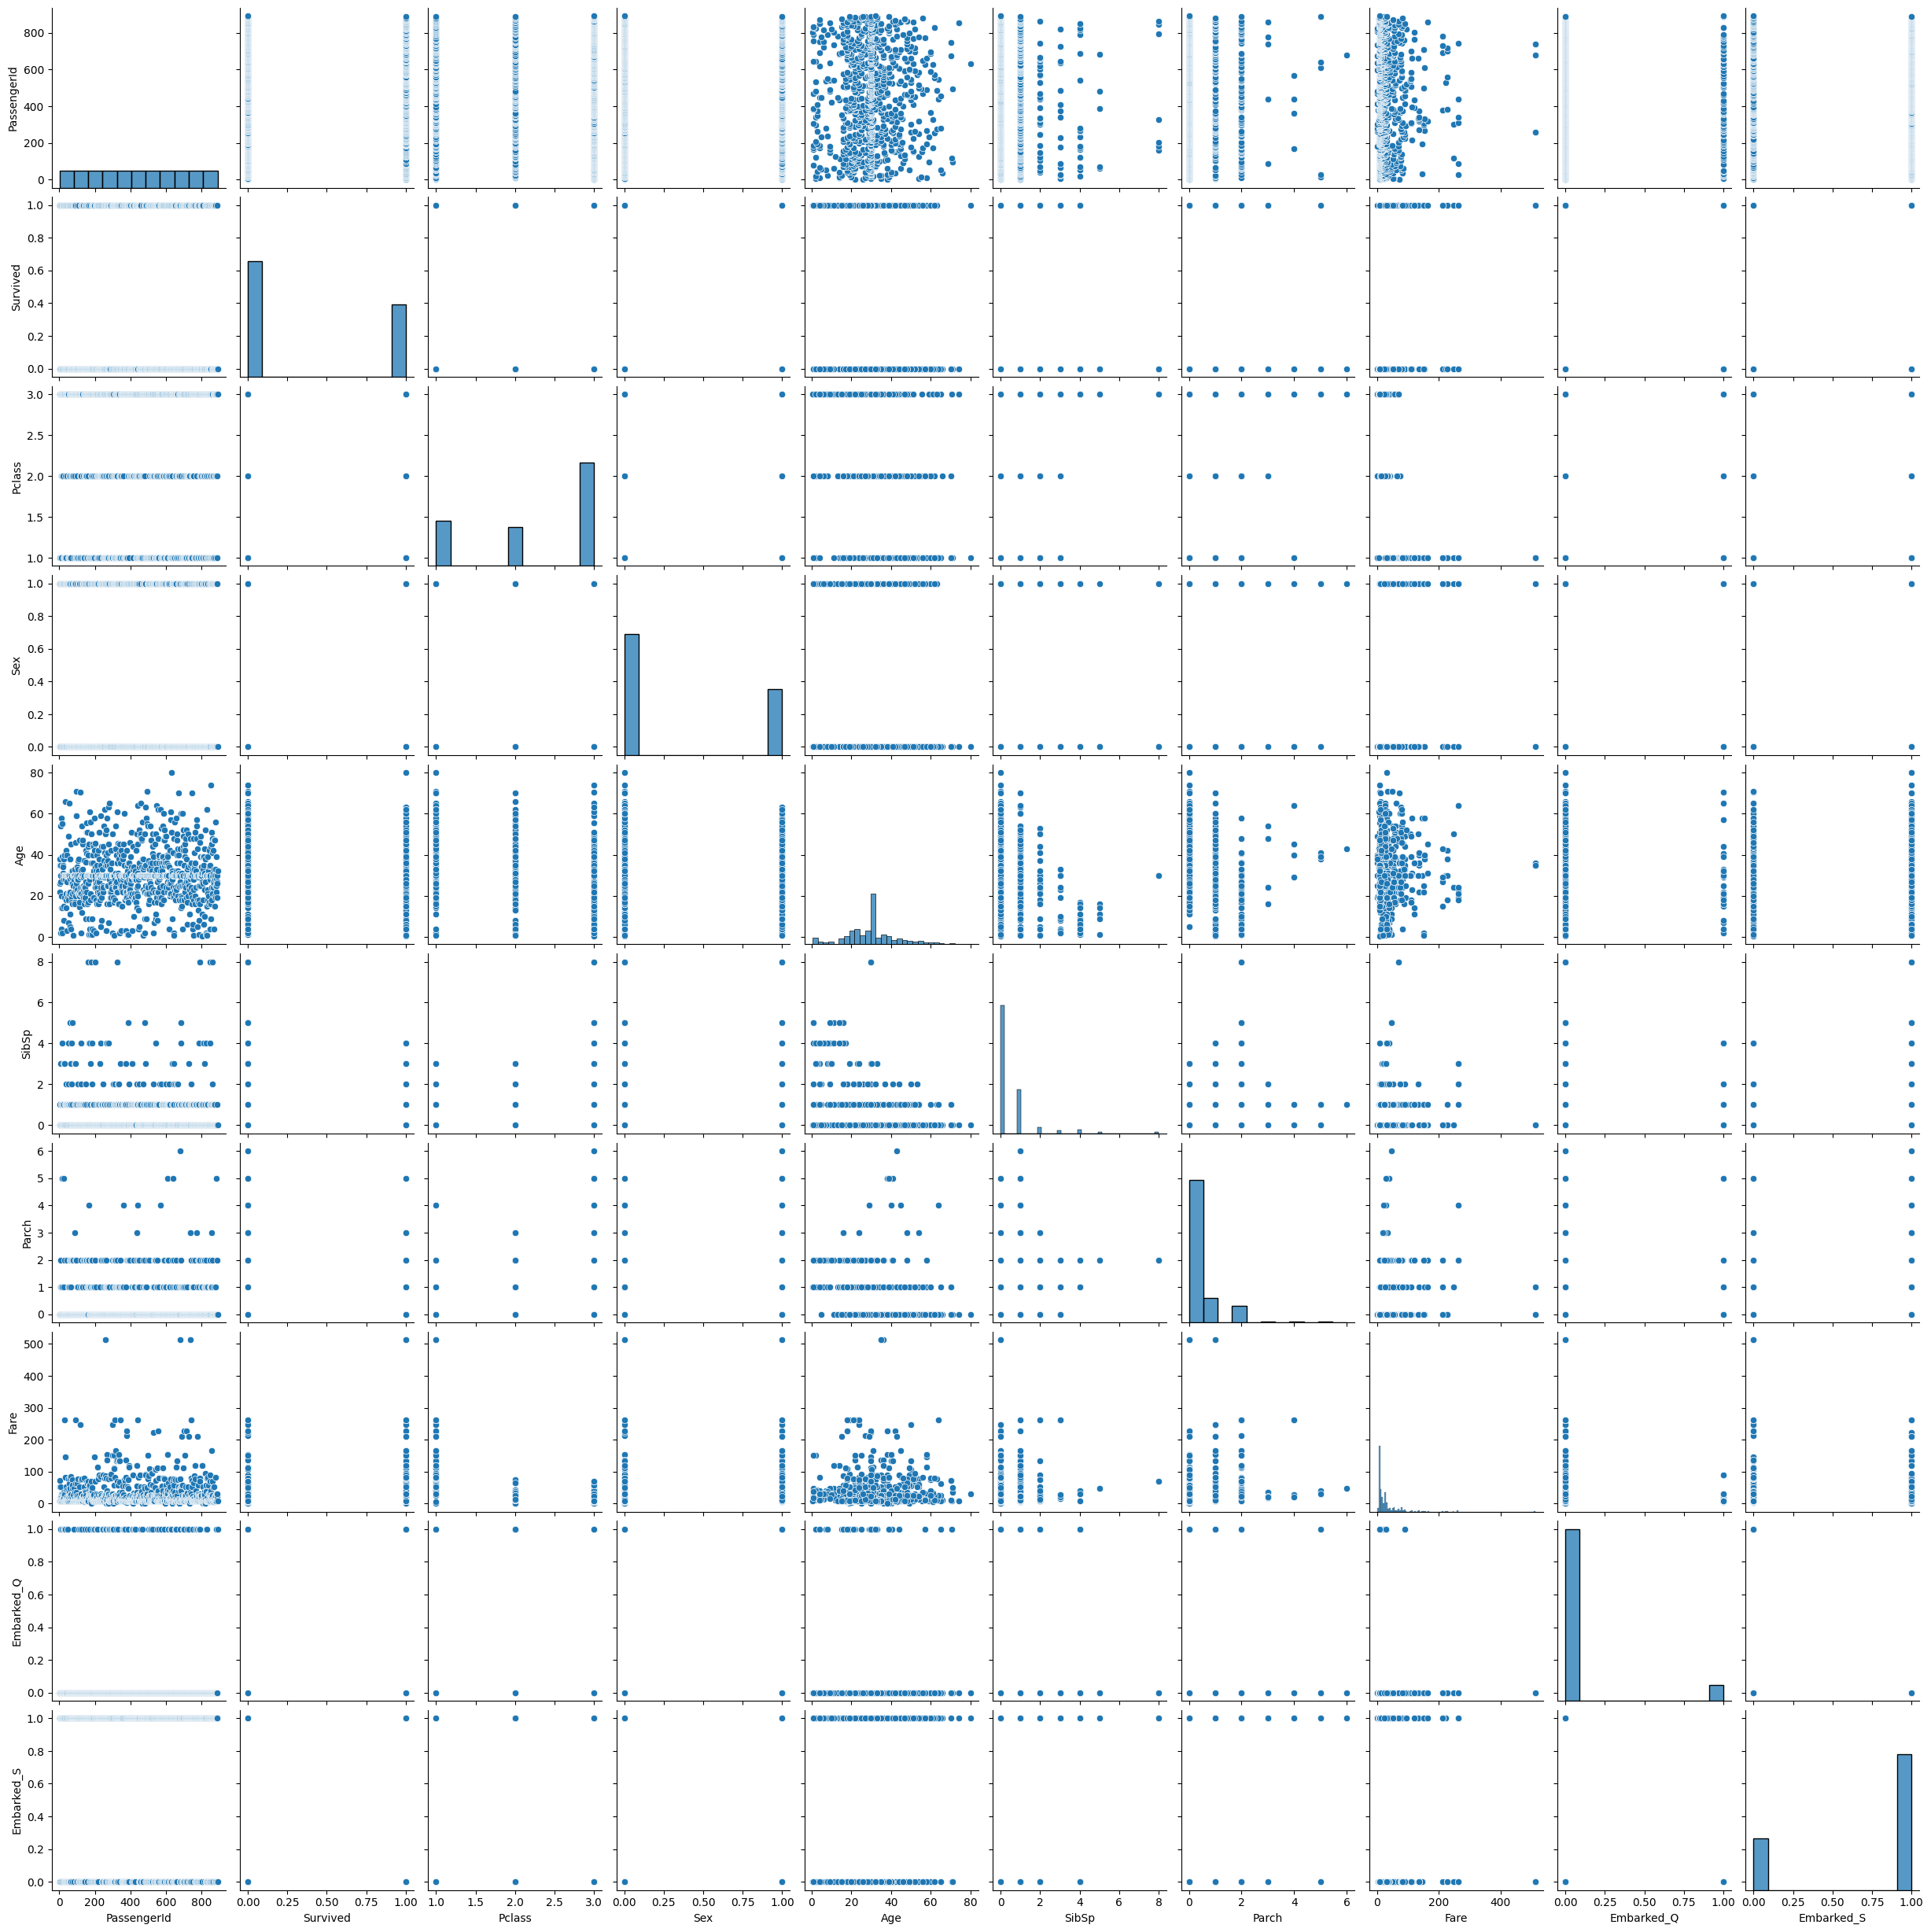

In [110]:
# Create a pairplot of the Titanic dataset

sns.pairplot(df)
plt.show()


## Exercise: 
Create a box plot using Seaborn to show the distribution of values for different categories in a dataset.

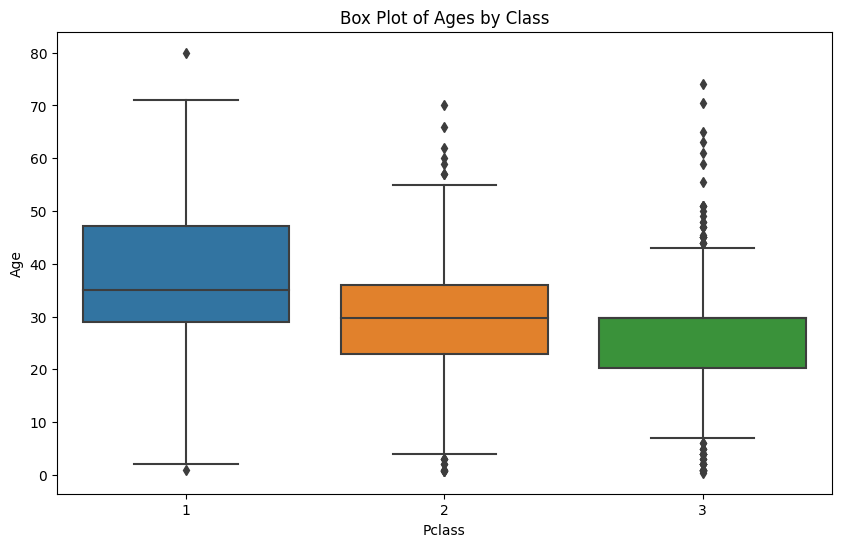

In [112]:
# Box plot of age distribution by passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Box Plot of Ages by Class')
plt.show()


## Exercise: 
Plot a heatmap using Seaborn to visualize the correlation matrix of a dataset.

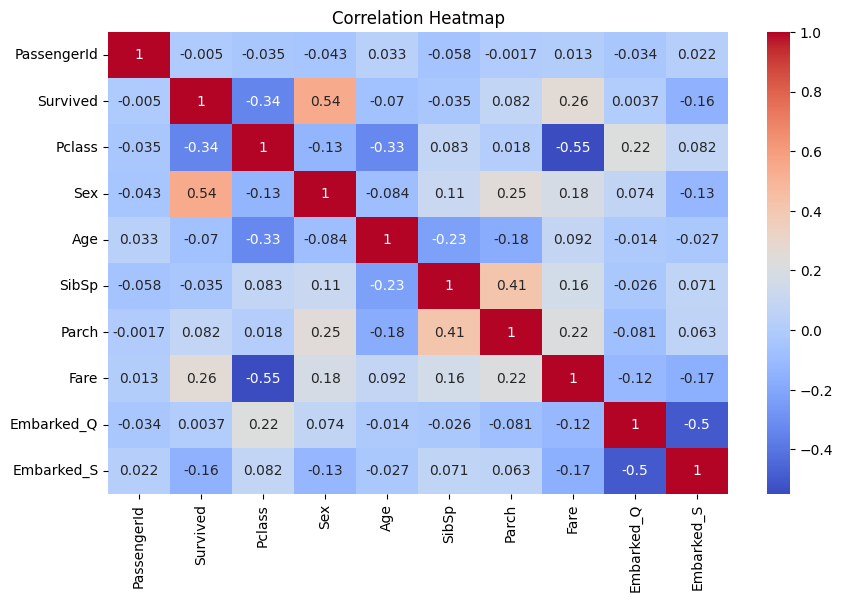

In [113]:
# Heatmap of correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Exercise: 
Use Matplotlib to create a subplot grid that displays multiple charts in a single figure.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


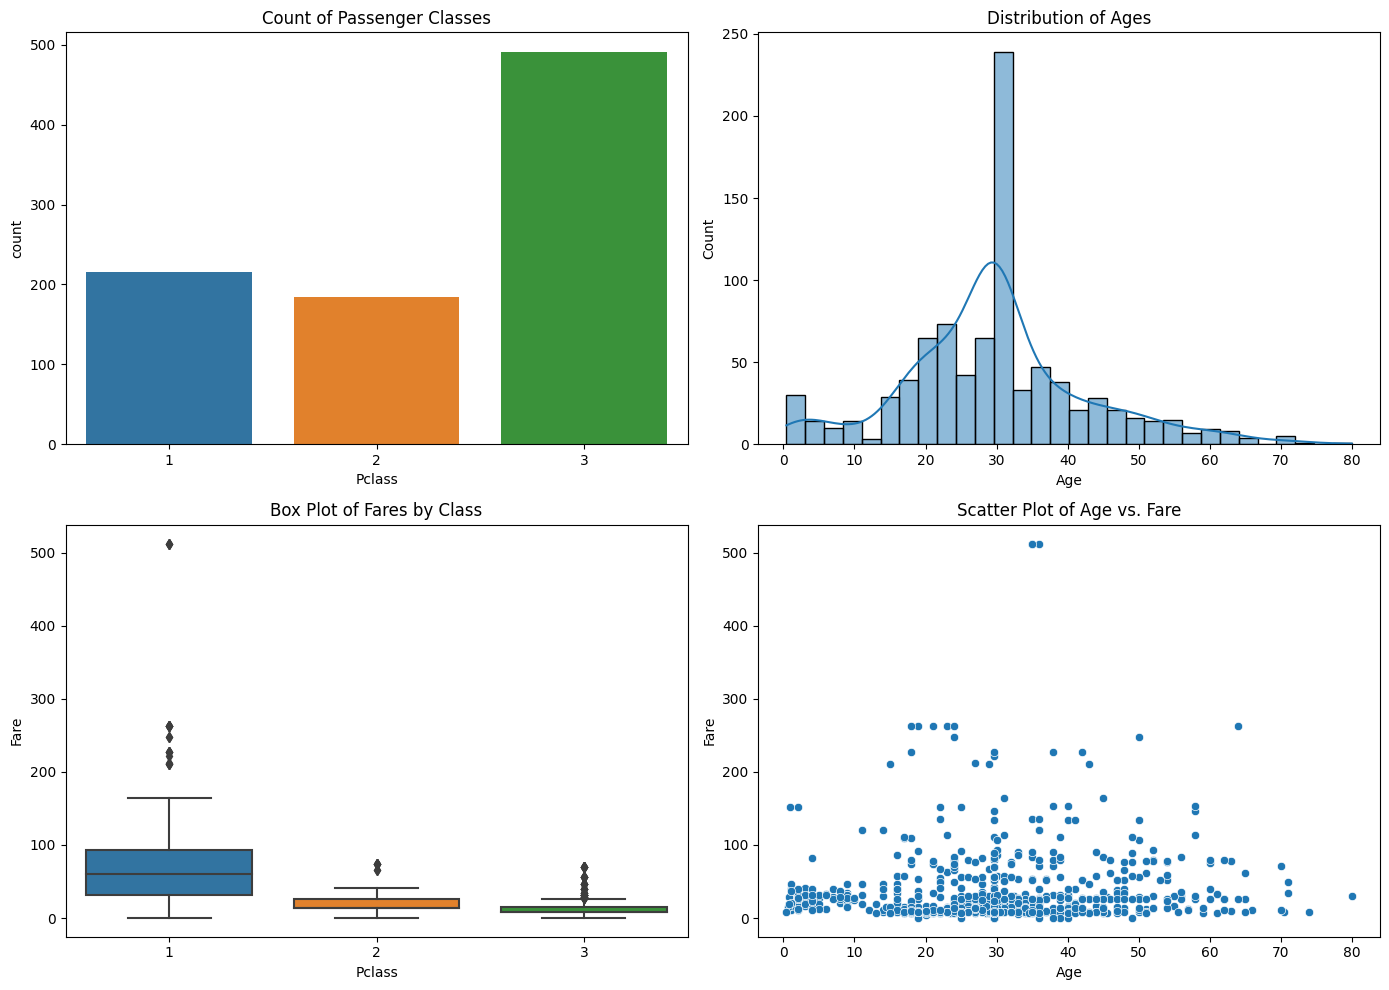

In [114]:
# Create a subplot grid with multiple charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First subplot: Count plot of classes
sns.countplot(data=df, x='Pclass', ax=axes[0, 0])
axes[0, 0].set_title('Count of Passenger Classes')

# Second subplot: Histogram of ages
sns.histplot(data=df, x='Age', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Ages')

# Third subplot: Box plot of fares by class
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Fares by Class')

# Fourth subplot: Scatter plot of Age vs. Fare
sns.scatterplot(data=df, x='Age', y='Fare', ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of Age vs. Fare')

plt.tight_layout()
plt.show()


## Exercise: 
Customize the appearance of a Seaborn plot by changing the color palette, adding titles, and modifying axis labels.

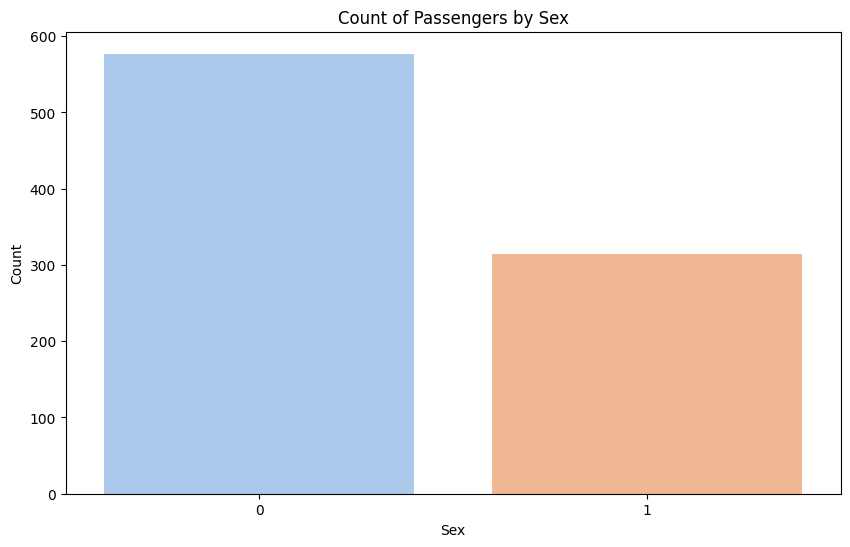

In [116]:
# Customize the appearance of a Seaborn plot
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
sns.countplot(data=df, x='Sex')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


## Exercise: 
Create a violin plot using Seaborn to visualize the distribution of a dataset across different categories.

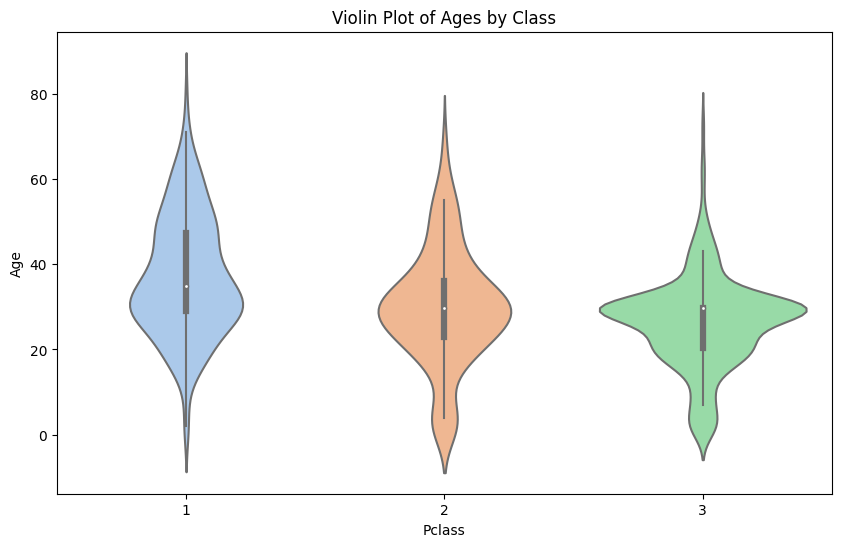

In [117]:
# Violin plot of age distribution by passenger class
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Pclass', y='Age')
plt.title('Violin Plot of Ages by Class')
plt.show()


## Exercise: 
Combine Matplotlib and Seaborn to create a complex visualization, such as overlaying a KDE plot on a histogram.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


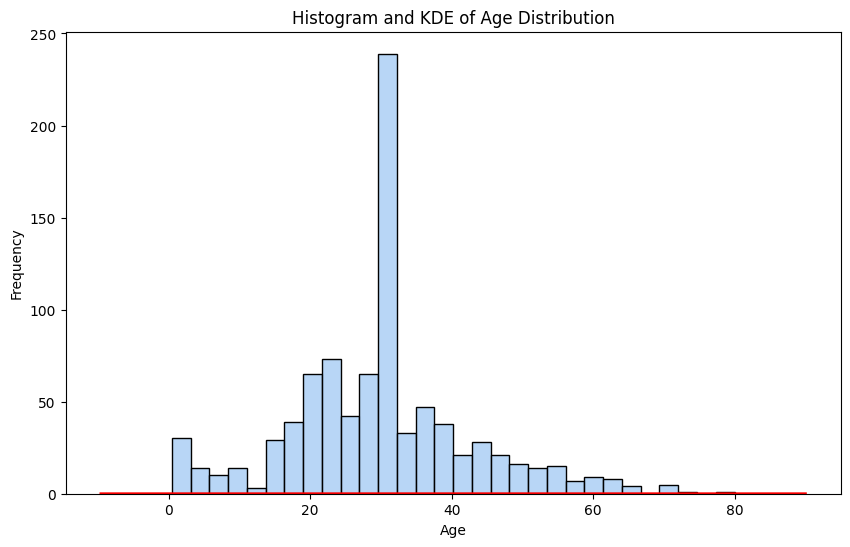

In [118]:
# Complex visualization combining Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=False)
sns.kdeplot(data=df, x='Age', color='red', lw=2)
plt.title('Histogram and KDE of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
